In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/jeffreyhazboun/GoogleDrive/PulsarSignalSimulator/PulsarSimulator/VersionZeroPointZero')
sys.path.append('/Users/jeffrey/GoogleDrive/PulsarSignalSimulator/PulsarSimulator/VersionZeroPointZero')
import signal as sig
#import pulsar as puls
#import ism as ism
import math, scipy
import scipy as sp
from scipy import signal

In [2]:
from matplotlib.pyplot import *

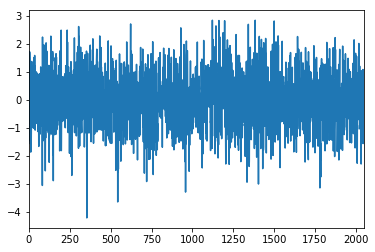

In [3]:
length = 2048
data = np.random.normal(0,1,length)
xlim(0,len(data))
plot(data)
show()

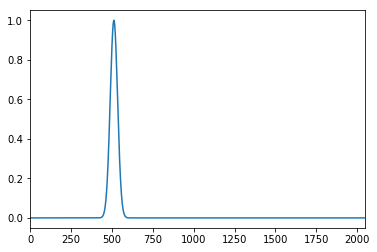

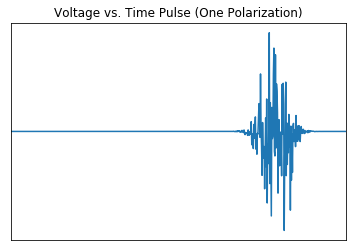

In [4]:
time = np.arange(length)
window = np.exp(-(time-512)**2/1000.0)
xlim(0,len(window))
plot(window)
show()
title("Voltage vs. Time Pulse (One Polarization)")
xticks([])
yticks([])
xlim(0,650)#len(window))
plot(window*data)
show()

In [25]:
def DataSeries(N=1):
    pulseSeries=[]
    for ii in range(N):
        pulseSeries= np.append(pulseSeries,np.random.normal(0,1,length)*window)
    dataSeries=pulseSeries + 1*np.random.normal(0,1,len(pulseSeries))
    return dataSeries,pulseSeries
dataSeries, pulseSeries= DataSeries()

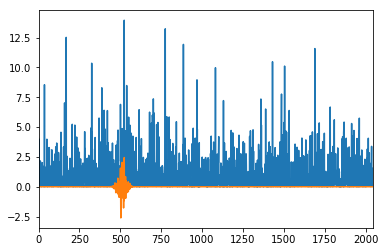

In [26]:
xlim(0,len(dataSeries))
plot(dataSeries**2)
plot(pulseSeries)
show()

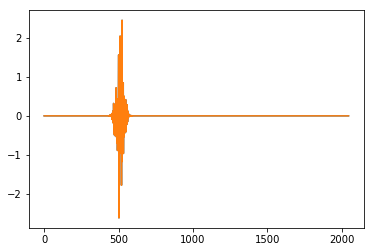

In [32]:
a1 = np.fft.rfft(pulseSeries)
a2 = np.fft.irfft(a1)
plot(pulseSeries)
plot(a2)
show()

In [33]:
length2 = len(a1)
print(length2)
lengtH2 = len(a1test)
print lengtH2

1025


NameError: name 'a1test' is not defined

In [34]:
DM = 200
freq = np.linspace(-200e6,0,length2)
# I tried to change 
FREQ = np.fft.rfftfreq(2*len(freq)-1)
f0 = 820
H_ = np.exp(1j*2*np.pi*4.148808e9/((FREQ+f0)*f0**2)*DM*FREQ**2)
H = np.exp(1j*2*np.pi*4.148808e9/((freq+f0)*f0**2)*DM*freq**2)
a3 = a1*H_
a4 = np.fft.irfft(a3)
print len(H_)

1025


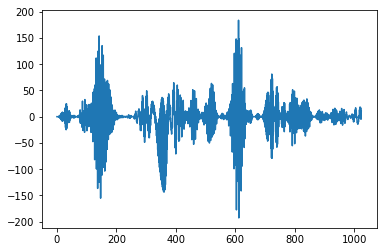

In [35]:
#plot()
#show()
#xlim(3000,4000)
plot(a3.imag**2+a1.real**2-a1.imag**2-a1.real**2)
show()

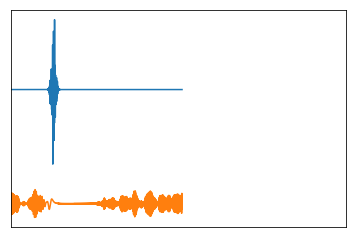

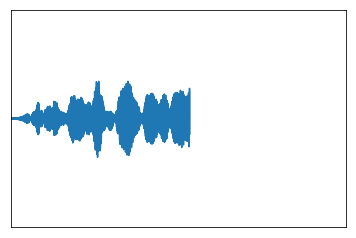

In [36]:
xlim(0,4000)
xticks([])
yticks([])
plot(pulseSeries+4)
plot(a4)
show()
xlim(950,3000)
ylim(-1.3,1.3)
xticks([])
yticks([])
plot(a4)
show()
show()

In [37]:
# I defined a function that just shifts over arrays/lists by some amount.  This felt like cheating but I wanted 
# to see if it would do the trick.  Spoiler alert, as of right now it very much so doesn't.  (Of course)
def shift(array, int):
    shifted=[]
    for i in array:
        shifted.append(i+int)
    return shifted
# It just shifted everything vertically rather than horizontally.  Lame

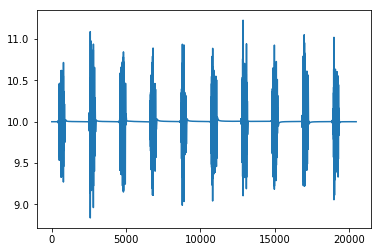

In [195]:
a4shifted = shift(a4, 10)
plot(a4shifted)
show()
type(a4shifted)
A4shifted = np.asarray(a4shifted)

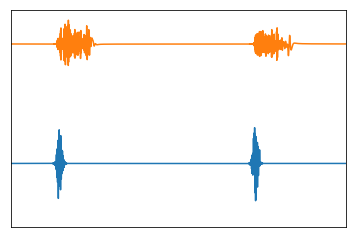

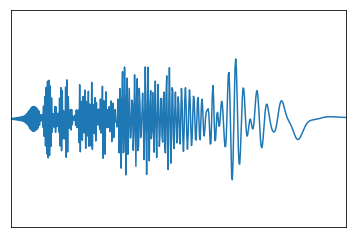

In [194]:
xlim(0,3500)
xticks([])
yticks([])
plot(pulseSeries+4)
plot(A4shifted)
show()
xlim(450,950)
ylim(-1.3,1.3)
xticks([])
yticks([])
plot(a4)
show()
show()

10241
20480


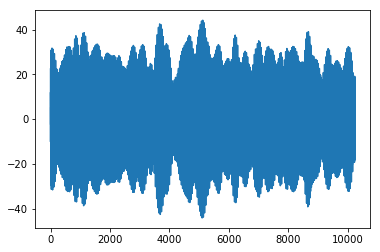

In [192]:
plot(a1)
print len(a1)
print len(pulseSeries)

10241
5121
10240


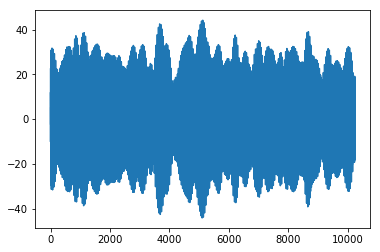

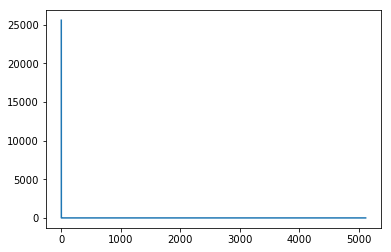

In [196]:
# Now to try changing the sampling frequencies.  I got an error message when I tried to change just some of them
# of course, because that made not all the arrays the same length.  Which probably means this won't do anything
# BUT I WONT GIVE UP HOPE alright from the top now
PULSESERIES = np.fft.rfftfreq(len(pulseSeries),d=.1)
a1test = np.fft.rfft(PULSESERIES)
a2test = np.fft.irfft(a1test)
print len(PULSESERIES)
print len(a1test)
print len(a2test)
plot(a1)
show()
plot(a1test)
show()
# I'm not really sure why I'm losing exactly 1 number.  I get that taking the real FFT in a1test divides the
# length of PULSESERIES by 2 and adds 1 (for 0) but I can't tell why I would lose 1 when I go back to time 
# The above definition of a1test is wrong because of the input of already transformed frequencies
# wrong wrong wrong
# This is wrong

In [207]:
DM = 200
freq = np.linspace(-200e6,0,len(a1test))
# Defining Freq with just len(freq) it throws an error because it makes H and a1test different lengths
Freq = np.fft.rfftfreq((2*len(freq)-1))
f0 = 820e6
H = np.exp(1j*2*np.pi*4.148808e9/((freq+f0)*f0**2)*DM*freq**2)
Htest = np.exp(1j*2*np.pi*4.148808e9/((Freq+f0)*f0**2)*DM*Freq**2)
a3test = a1test*Htest
a4test = np.fft.irfft(a3test)
print len(a1test)
print len(H)
# EVERYTHING SEEMS TO WORK SO FAR. FOR THE MOMENT OF TRUTH

ValueError: operands could not be broadcast together with shapes (10241,) (5121,) 

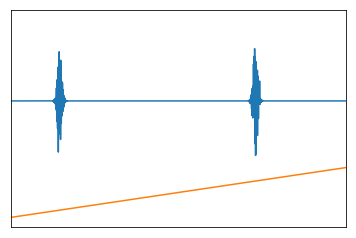

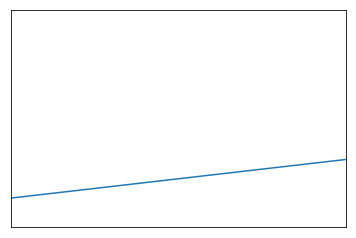

In [206]:
xlim(0,3500)
xticks([])
yticks([])
plot(pulseSeries+4)
plot(a4test)
show()
xlim(1000,3000)
xticks([])
yticks([])
plot(a4test)
show()
show()

# ah yes the sweet and familiar taste of failure

In [197]:
# It might work to shift only the dispersed signal on one plot, then add it to the other plot afterward
qW = [1,2,3,4,5,6,7,8,9,10]
qW2 = [11,12,13,14,15,16,17,18,19,20]

QW = np.asarray(qW)
QW2 = np.asarray(qW2)

QQ = np.fft.rfftfreq(len(QW),d=0.01)
QQQ = np.fft.rfftfreq(len(QW2))
print(QQ)
print(QQQ)

[  0.  10.  20.  30.  40.  50.]
[ 0.   0.1  0.2  0.3  0.4  0.5]


In [12]:
G = np.exp(-1j*2*np.pi*4.148808e9/(f0)*5*DM*freq)
a5 = a1*G
a6 = np.fft.irfft(a5)

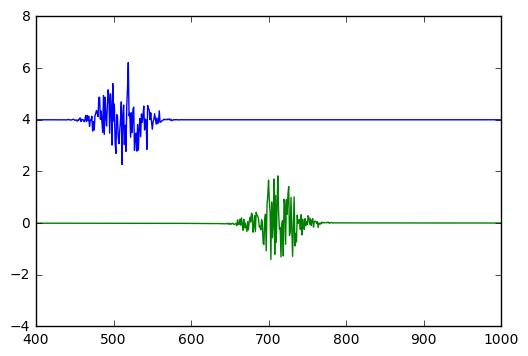

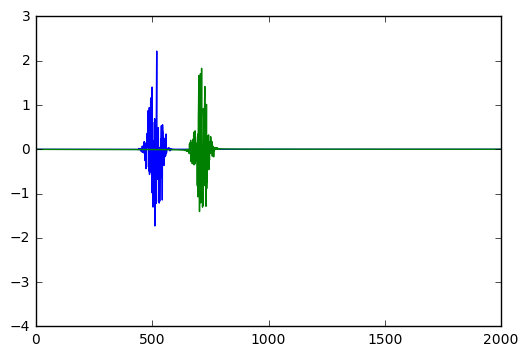

In [19]:
xlim(400,1000)
plot(pulseSeries+4)
plot(a6)
show()
xlim(0,2000)
plot(pulseSeries)
plot(a6)
show()

In [20]:
data_fft=np.fft.rfft(dataSeries**2)
f1,Power1 = sp.signal.periodogram(dataSeries)
f2,Power2 = sp.signal.periodogram(dataSeries**2)

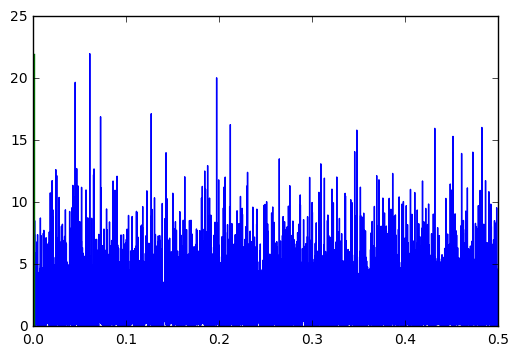

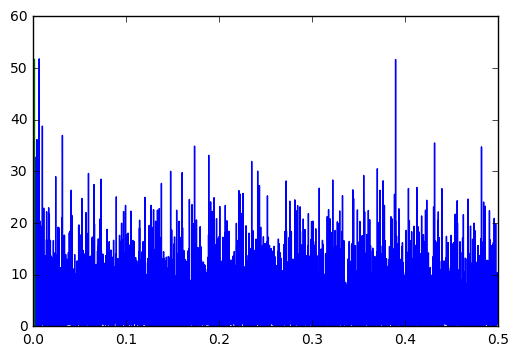

In [21]:
#xlim(0,1e-2)
L=len(Power1)
plot(f1,Power1)
plot(np.ones(10)*1/1024,np.linspace(0,np.amax(Power1),10))
show()
plot(f2,Power2)
plot(np.ones(10)*1/1024,np.linspace(0,np.amax(Power2),10))
show()

In [22]:
i = 100
ToSum = np.zeros((i,10240))
for ii in range(i):
    ToSum[ii,:] = DataSeries(3)
xlim(0,len(ToSum[2,:]))
plot(ToSum[2,:])
show()

ValueError: cannot copy sequence with size 2 to array axis with dimension 10240

In [23]:
Folded = np.sum(ToSum**2,axis=0)
ProdFolded = np.product(ToSum**2,axis=0)

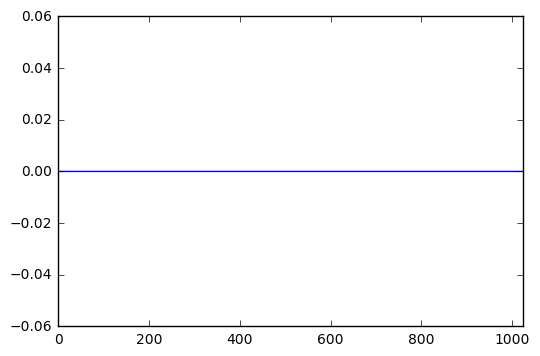

/Users/jeffreyhazboun/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


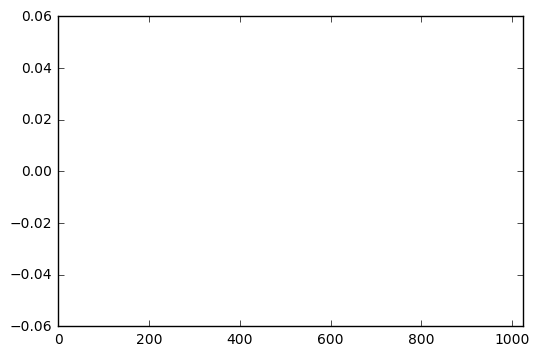

In [18]:
xlim(0,len(Folded)/10)
plot(Folded)
show()
xlim(0,len(Folded)/10)
#ylim(1e-150,1e-20)
plot(np.log(ProdFolded))
show()

In [281]:
np.amin(np.log(ProdFolded**2))

-438.00988060560576

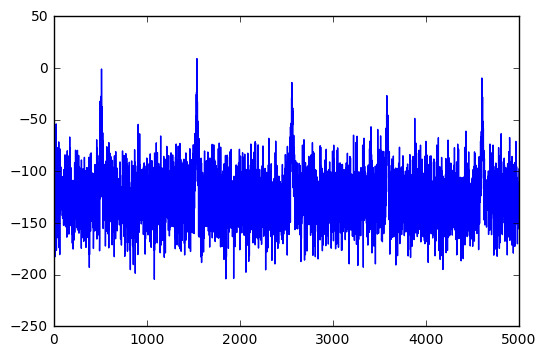

In [282]:
xlim(0,5000)
plot(np.sum(np.log(ToSum**2),axis=0))
show()

In [44]:
def PowerSpectrum(x,step):
    L = len(x)//step
    PS = np.empty((step//2+1,L))
    for ii in range(L):
        start = ii*step
        stop = (ii+1)*step
        #PS[:,ii] = np.fft.rfft(x[start:stop])
        f, PS[:,ii] = sp.signal.periodogram(x[start:stop],12.5e6)
    return PS

In [45]:
P1 = PowerSpectrum(Folded,2**6)

NameError: name 'Folded' is not defined

In [285]:
P1.shape

(33, 160)

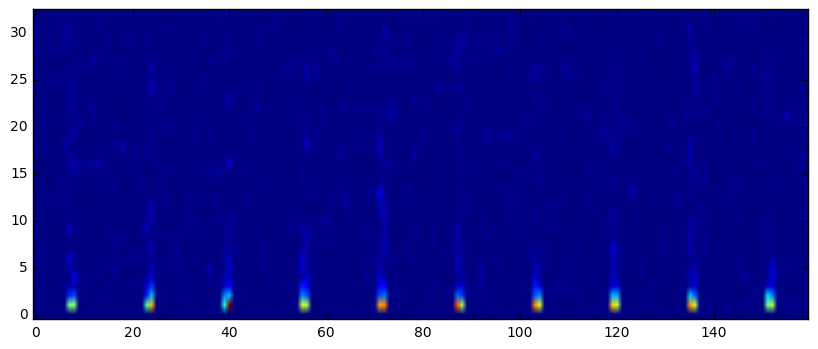

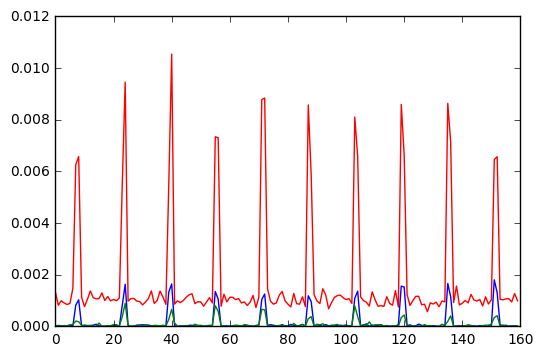

In [302]:
figure(figsize=[10,4])
imshow(P1, origin='lower', aspect='auto')
show()
xlim(0,len(P1[0,:]))
plot(P1[2,:])
plot(P1[3,:])
plot(np.sum(P1,axis=0))
show()

In [289]:
P2= PowerSpectrum(dataSeries,2**7)

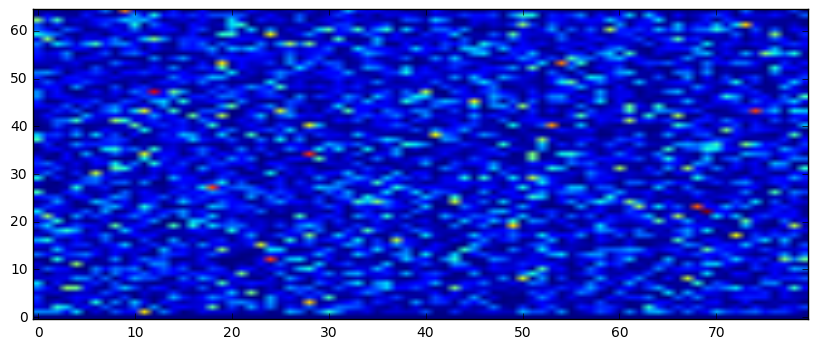

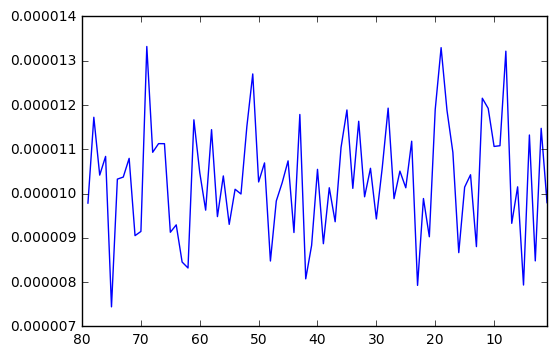

In [290]:
figure(figsize=[10,4])
imshow(P2, origin='lower', aspect='auto')
show()
xlim(len(P2[0,:]))
plot(np.sum(P2,axis=0))
show()

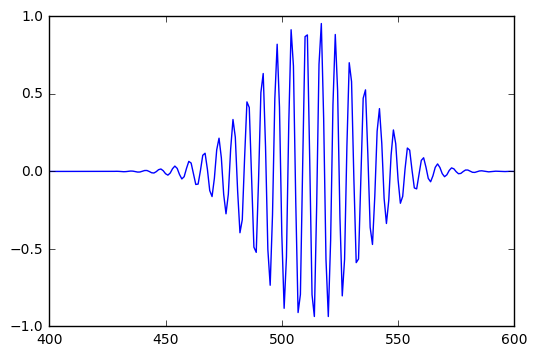

In [48]:
SinG = np.sin(time)*window
xlim(400,600)
plot(SinG)
show()

In [65]:
WPacketTest = np.fft.rfft(SinG)*H
Shifted_WP = np.fft.irfft(WPacketTest)

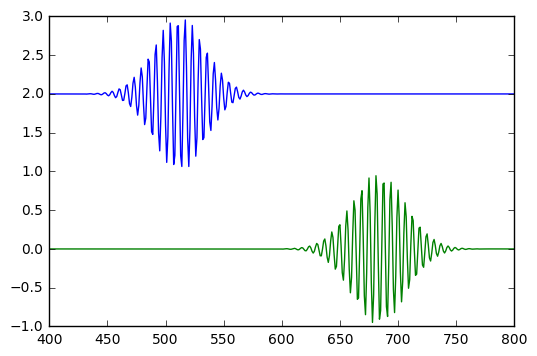

In [67]:
xlim(400,800)
plot(SinG+2)
plot(Shifted_WP)

show()

In [51]:
SinG.shape

(2048,)

# Jeff's Attempts

In [19]:
def H_disp(Freq,F0):
    return np.exp(1j*2*np.pi*4.148808e9/((Freq+F0)*F0**2)*DM*Freq**2)
    

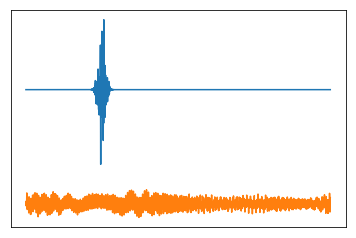

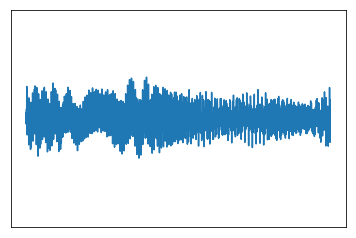

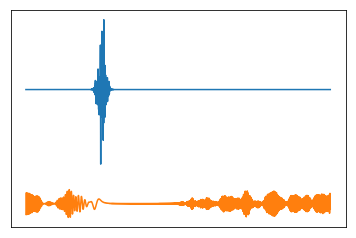

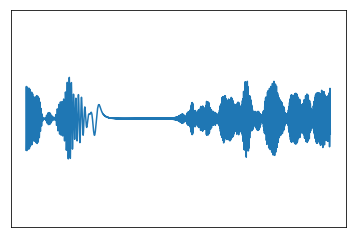

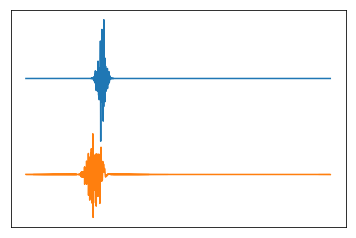

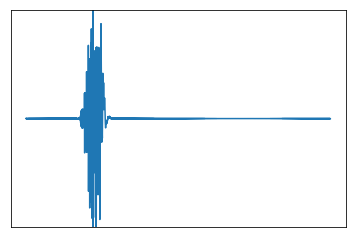

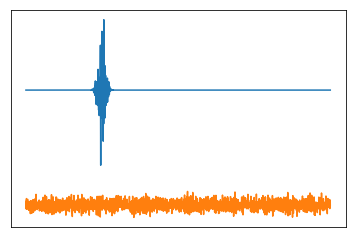

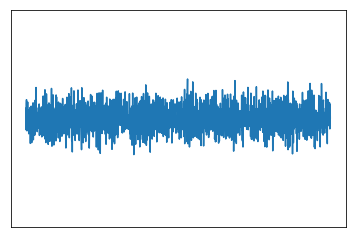

In [41]:
DM = 200
FREQ = np.fft.rfftfreq(2*len(freq)-1)
f0 = [400,820,2000,FREQ[FREQ.size//2]]#The last is the middle frequency from rfftfreq()
for F0 in f0:
    c3 = a1*H_disp(FREQ,F0)
    c4 = np.fft.irfft(c3)
    #xlim(0,4000)
    xticks([])
    yticks([])
    plot(pulseSeries+4)
    plot(c4)
    show()
    #xlim(950,3000)
    ylim(-1.3,1.3)
    xticks([])
    yticks([])
    plot(c4)
    show()


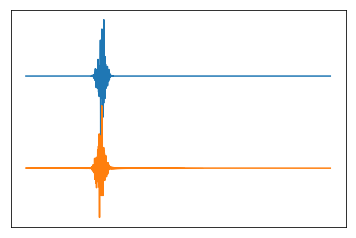

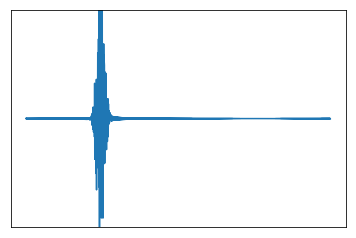

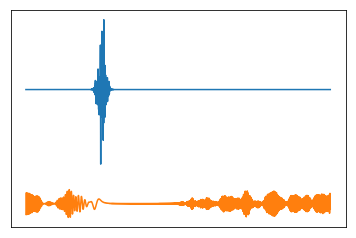

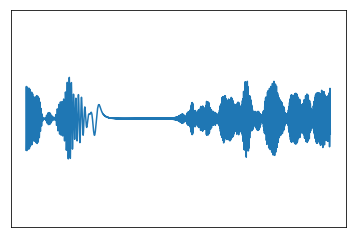

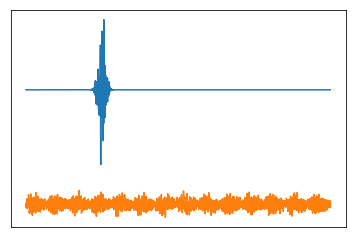

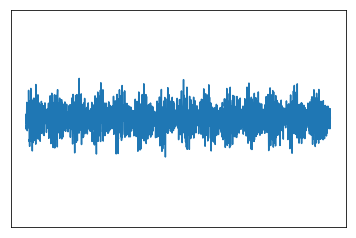

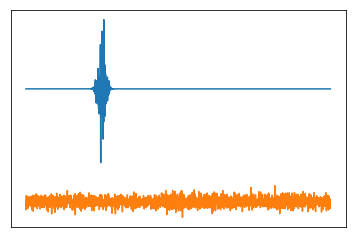

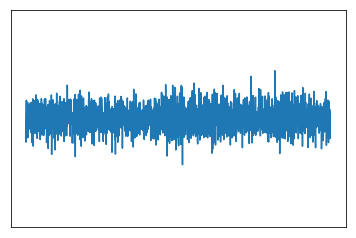

In [42]:
DM = 200
dt_array=[10,1,0.1,0.01]
for dt in dt_array:
    FREQ = np.fft.rfftfreq(2*len(freq)-1,d=dt)
    c3 = a1*H_disp(FREQ,820)
    c4 = np.fft.irfft(c3)
    #xlim(0,4000)
    xticks([])
    yticks([])
    plot(pulseSeries+4)
    plot(c4)
    show()
    #xlim(950,3000)
    ylim(-1.3,1.3)
    xticks([])
    yticks([])
    plot(c4)
    show()

